In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
import imblearn
from imblearn.over_sampling import SMOTE

### Goal:
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [3]:
df=pd.read_csv(r'C:\Users\User\Desktop\DATA SCIENCE\Kaggle Projects\Stroke Prediction - Logitsic Regression\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.shape

(5110, 12)

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Null values handling 

In [7]:
df['bmi']=df['bmi'].fillna(np.round(df.bmi.mean(),2))

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Descriptive Statistics 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893110,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [10]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.20,Unknown,0


### Feature engineering 

In [11]:
#Replacing the 'Unknown' column
df[df['smoking_status']=='Unknown']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.89,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.89,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,28.89,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.50,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.50,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.50,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.90,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.60,Unknown,0


In [12]:
df[df['smoking_status']=='Unknown'].shape

(1544, 12)

* Although there are no missing values in the dataset anymore, it is important to note at this point that the column 'smoking_status' contains values "Unknown" which means that the information is unavailable for this patient.

In [13]:
df['smoking_status']=df['smoking_status'].replace('Unknown',df['smoking_status'].mode()[0],inplace=True)

* NOTE: mode()[0] returns the value with maximum frequency. 

In [14]:
#Dropping the id column
df.drop('id',axis=1,inplace=True)

### Pairplot 

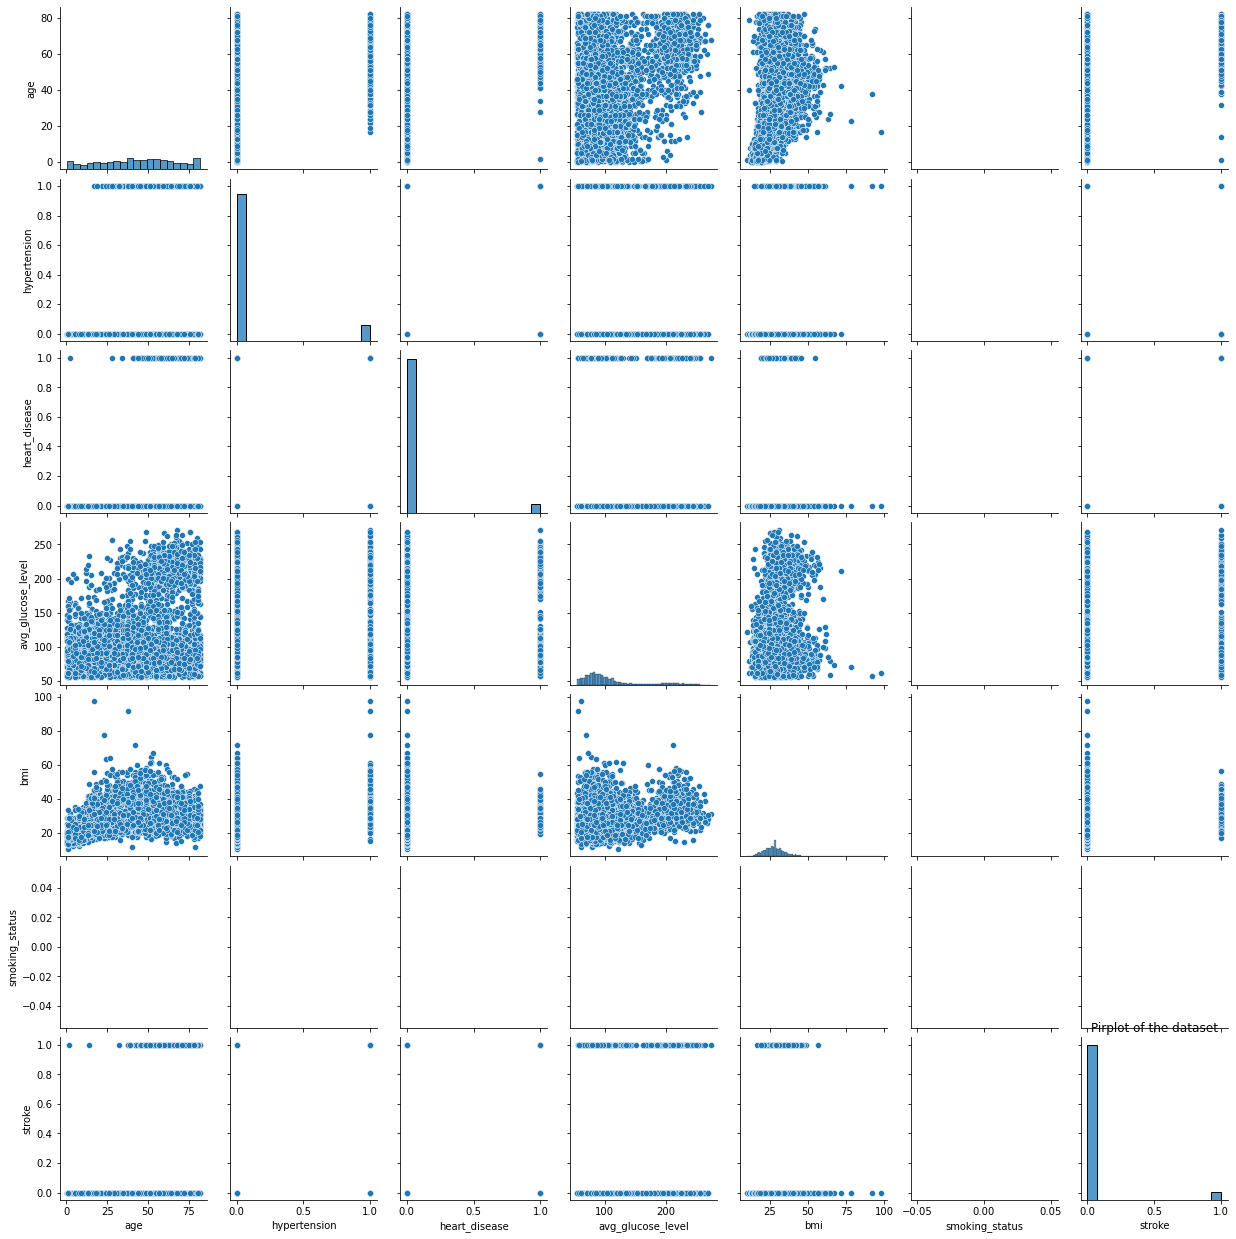

In [15]:
sns.pairplot(df, palette = 'GnBu')
plt.title('Pirplot of the dataset')
plt.show()

## Checking if there are outliers

In [16]:
cont_features=[feature for feature in df.columns if ((df[feature].dtypes!='O'))]
cont_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

age


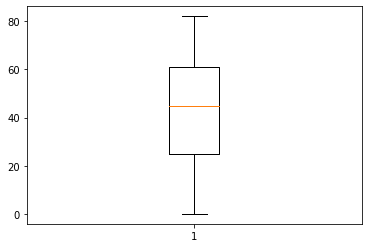

hypertension


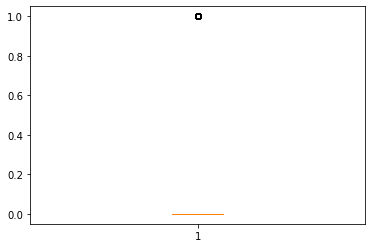

heart_disease


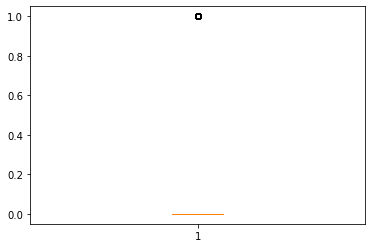

avg_glucose_level


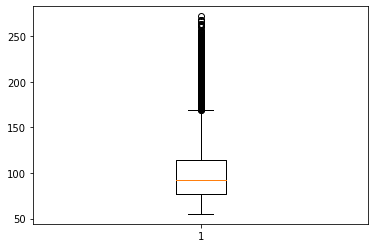

bmi


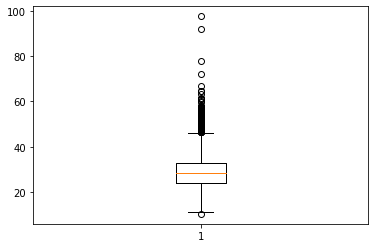

stroke


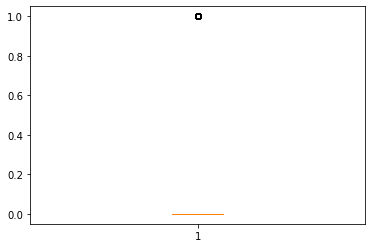

In [17]:
for i in cont_features:
    plt.boxplot(df[i])
    print(i)
    plt.show()

## Treating Outliers 

#### avg_glucose_level 

In [18]:
Q3 = df.avg_glucose_level.quantile(0.75)
Q1 = df.avg_glucose_level.quantile(0.25)
IQR = Q3 - Q1
he = Q3+ (1.5 * IQR)
le = Q1-(1.5*IQR)

In [19]:
(df.avg_glucose_level.max()- he)/3

34.1275

In [20]:
for i in np.arange(he,df.avg_glucose_level.max(),34.1275):
    outlier= len(df.avg_glucose_level[df.avg_glucose_level>i])

In [21]:
print('Range of number :',round(i,2),'number of outliers :',outlier)

Range of number : 237.61 number of outliers : 68


In [22]:
# here we are converting the outliers data in to higher end 
df.avg_glucose_level=np.where(df.avg_glucose_level > he,he,df.avg_glucose_level)          r                      

In [23]:
df.shape

(5110, 11)

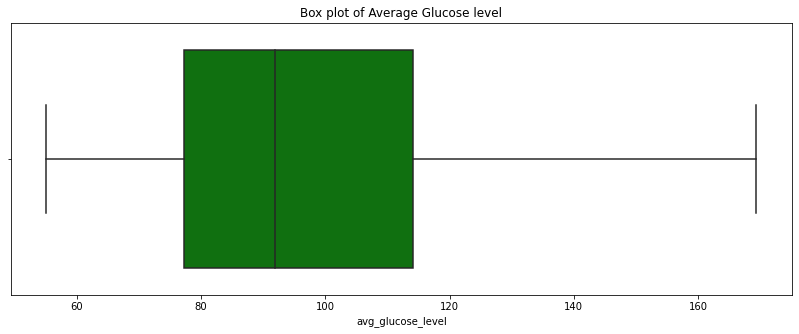

In [24]:
plt.figure(figsize=(14,5))
sns.boxplot(df.avg_glucose_level,color='green')
plt.title('Box plot of Average Glucose level')
plt.show()

#### bmi 

In [25]:
Q3 = df.bmi.quantile(0.75)
Q1 = df.bmi.quantile(0.25)
IQR = Q3 - Q1
he = Q3+ (1.5 * IQR)
le = Q1-(1.5*IQR)

In [26]:
(df.bmi.max()- he)/3

17.1

In [27]:
for i in np.arange(he,df.bmi.max(),17.1):
    outlier= len(df.bmi[df.bmi>i])

In [28]:
print('Range of number :',round(i,2),'number of outliers :',outlier)

Range of number : 80.5 number of outliers : 2


In [29]:
# here we are converting the outliers data in to higher end 
df.bmi=np.where(df.bmi > he,he,df.bmi)                                

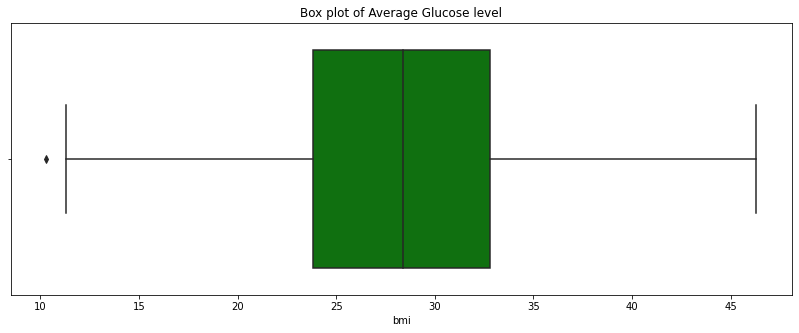

In [30]:
plt.figure(figsize=(14,5))
sns.boxplot(df.bmi,color='green')
plt.title('Box plot of Average Glucose level')
plt.show()

In [31]:
df.shape

(5110, 11)

## EDA 

In [32]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O'))]
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

#### gender 

In [33]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [34]:
df=df[df.gender!='Other']

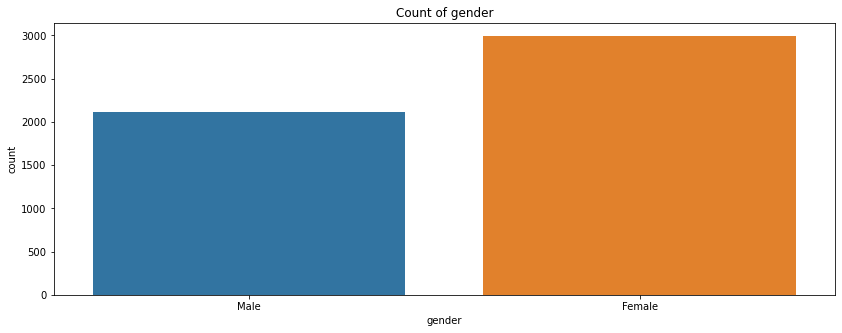

In [35]:
plt.figure(figsize=(14,5))
sns.countplot(df.gender)
plt.title('Count of gender')
plt.show()

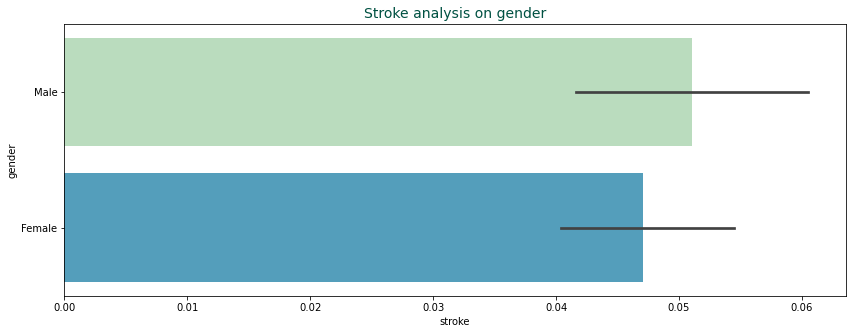

In [36]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'stroke', y = 'gender', data = df, palette = 'GnBu')
plt.title('Stroke analysis on gender', size = 14, color = '#005142')
plt.show()

#### ever_married 

In [37]:
df.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

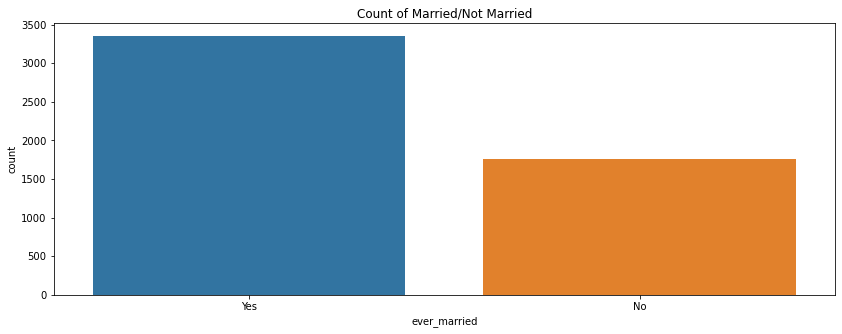

In [38]:
plt.figure(figsize=(14,5))
sns.countplot(df.ever_married)
plt.title('Count of Married/Not Married')
plt.show()

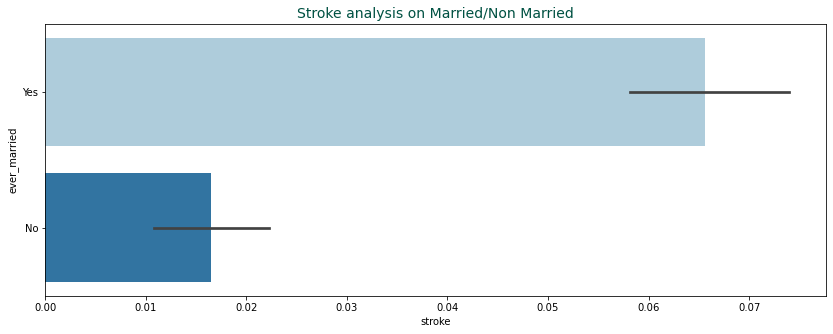

In [39]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'stroke', y = 'ever_married', data = df, palette = 'Paired')
plt.title('Stroke analysis on Married/Non Married', size = 14, color = '#005142')
plt.show()

#### work_type

In [40]:
df.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

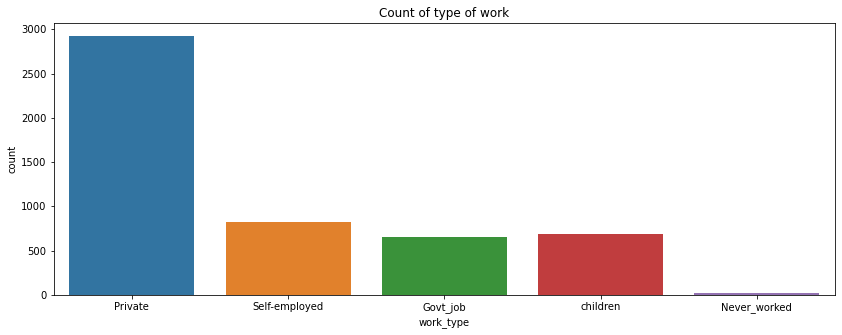

In [41]:
plt.figure(figsize=(14,5))
sns.countplot(df.work_type)
plt.title('Count of type of work')
plt.show()

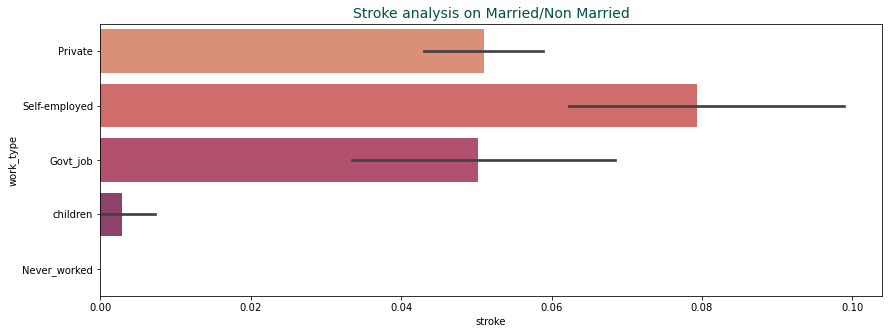

In [42]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'stroke', y = 'work_type', data = df, palette = 'flare')
plt.title('Stroke analysis on Married/Non Married', size = 14, color = '#005142')
plt.show()

#### Residence_type

In [43]:
df.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

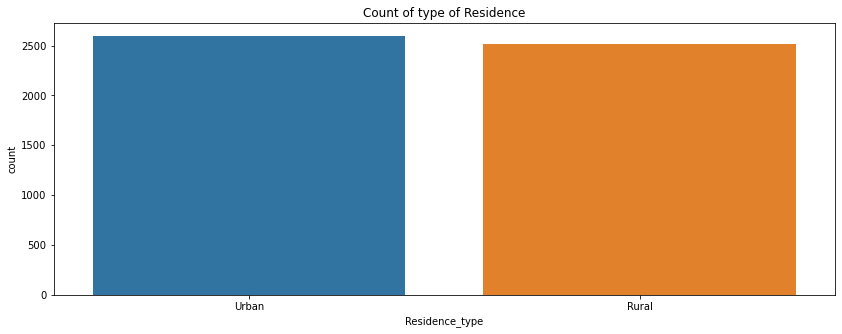

In [44]:
plt.figure(figsize=(14,5))
sns.countplot(df.Residence_type)
plt.title('Count of type of Residence')
plt.show()

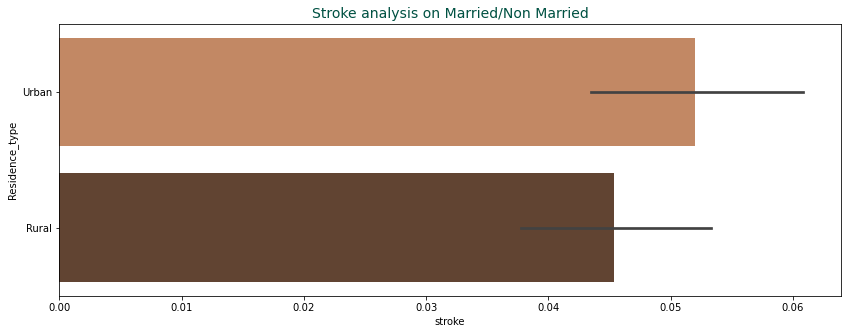

In [45]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'stroke', y = 'Residence_type', data = df, palette = 'copper_r')
plt.title('Stroke analysis on Married/Non Married', size = 14, color = '#005142')
plt.show()

In [46]:
continous_features=[feature for feature in df.columns if ((df[feature].dtypes=='float64'))]
continous_features

['age', 'avg_glucose_level', 'bmi']

#### age

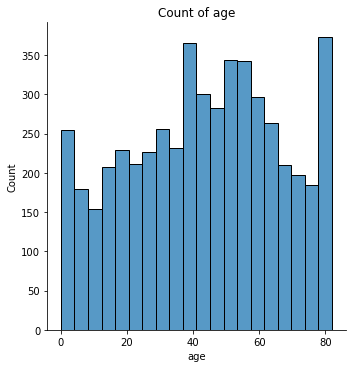

In [47]:
sns.displot(df.age)
plt.title('Count of age')
plt.show()

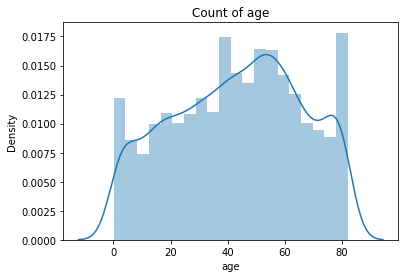

In [48]:
sns.distplot(df.age,kde=True)
plt.title('Count of age')
plt.show()

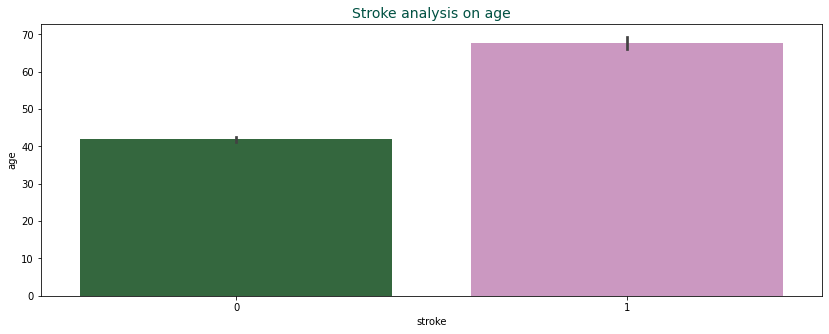

In [49]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'stroke', y = 'age', data = df, palette = 'cubehelix')
plt.title('Stroke analysis on age', size = 14, color = '#005142')
plt.show()

#### avg_glucose_level 

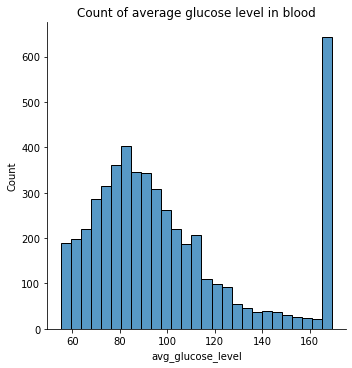

In [50]:
sns.displot(df.avg_glucose_level)
plt.title('Count of average glucose level in blood')
plt.show()

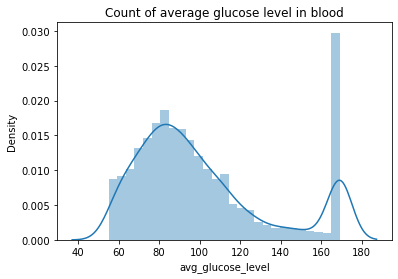

In [51]:
sns.distplot(df.avg_glucose_level)
plt.title('Count of average glucose level in blood')
plt.show()

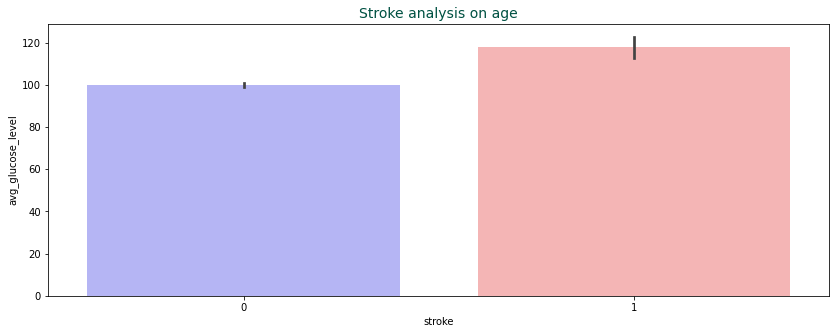

In [52]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'stroke', y = 'avg_glucose_level', data = df, palette = 'bwr')
plt.title('Stroke analysis on age', size = 14, color = '#005142')
plt.show()

#### bmi 

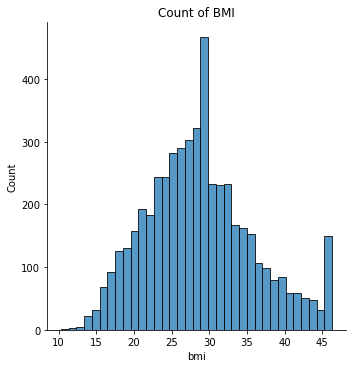

In [53]:
sns.displot(df.bmi)
plt.title('Count of BMI')
plt.show()

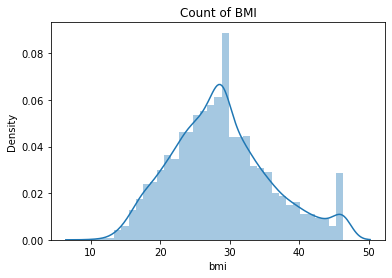

In [54]:
sns.distplot(df.bmi)
plt.title('Count of BMI')
plt.show()

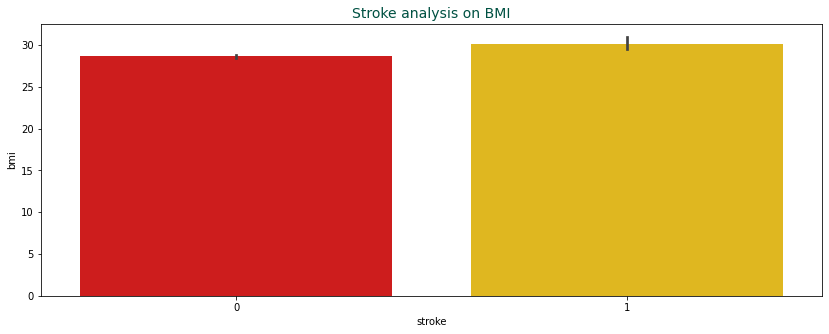

In [55]:
plt.figure(figsize=(14,5))
sns.barplot(x='stroke',y='bmi',data=df,palette='hot')
plt.title('Stroke analysis on BMI',size=14,color='#005142')
plt.show()

### Heat Map 

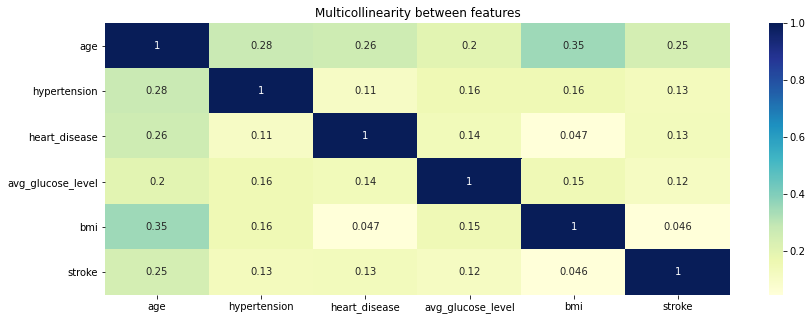

In [56]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.title('Multicollinearity between features')
plt.show()

## Data Preprocessing 

### Splitting the numerical and categorical features 

In [57]:
numeric_data=df.loc[:,df.nunique()>5]
numeric_data
#dataframe.nunique() function return Series with number of distinct observations over requested axis

,age,avg_glucose_level,bmi
0,67.0,169.3575,36.60
1,61.0,169.3575,28.89
2,80.0,105.9200,32.50
3,49.0,169.3575,34.40
4,79.0,169.3575,24.00
...,...,...,...
5105,80.0,83.7500,28.89
5106,81.0,125.2000,40.00
5107,35.0,82.9900,30.60
5108,51.0,166.2900,25.60


In [58]:
cols=[col for col in df.columns if col not in numeric_data]
categorical_data=df[cols].drop('stroke',axis=1)

In [59]:
numeric_data=pd.DataFrame(numeric_data)

In [60]:
categorical_data=pd.DataFrame(categorical_data)

In [61]:
print(f'Numerical data: {list(numeric_data)}')

Numerical data: ['age', 'avg_glucose_level', 'bmi']


In [62]:
print(f'Categorical data: {list(categorical_data)}')

Categorical data: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


### Standard Scaler 
Used to scale the continous features.
This arranges the data in a standard normal distribution, with mean as 0 and standard deviation as 1.

In [63]:
num_cols = numeric_data.columns.to_list()
sc = StandardScaler()
df[num_cols] = sc.fit_transform(df[num_cols])

In [64]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051242,0,1,Yes,Private,Urban,2.058738,1.106454,None,1
1,Female,0.785889,0,0,Yes,Self-employed,Rural,2.058738,0.023496,None,1
2,Male,1.626174,0,1,Yes,Private,Rural,0.148514,0.530562,None,1
3,Female,0.255182,0,0,Yes,Private,Urban,2.058738,0.797439,None,1
4,Female,1.581949,1,0,Yes,Self-employed,Rural,2.058738,-0.663361,None,1


### Label Encoding 
Converting the labels into a numeric form so as to use it to fit and evaluate a model.

In [65]:
le = LabelEncoder()
object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [66]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051242,0,1,1,2,1,2.058738,1.106454,0,1
1,0,0.785889,0,0,1,3,0,2.058738,0.023496,0,1
2,1,1.626174,0,1,1,2,0,0.148514,0.530562,0,1
3,0,0.255182,0,0,1,2,1,2.058738,0.797439,0,1
4,0,1.581949,1,0,1,3,0,2.058738,-0.663361,0,1


### SMOTE - Oversampling technique

 * SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [67]:
df['stroke'].value_counts() 

0    4860
1     249
Name: stroke, dtype: int64

* Since 0 and 1 is imbalanced, so we have to use SMOTE  

In [68]:
X = df.loc[:,df.columns!='stroke']
y = df.loc[:,df.columns=='stroke']

In [69]:
os = SMOTE(random_state=0)

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [71]:
columns = X_train.columns

In [78]:
columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [72]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['stroke'])

In [82]:
os_data_X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,-1.832264,0,0,0,4,1,-0.969240,0.023496,0
1,0,-0.319750,0,0,1,0,0,0.856445,0.137270,0
2,1,-0.408201,0,0,1,2,0,-0.509130,0.586747,0
3,1,-1.646517,0,0,0,4,0,0.916669,-1.548268,0
4,1,-0.452427,0,0,1,2,0,-0.786159,0.404147,0
...,...,...,...,...,...,...,...,...,...,...
6801,0,1.523318,0,0,1,2,1,-0.995901,-0.556208,0
6802,0,0.805827,0,0,0,2,1,-0.121892,-0.407767,0
6803,0,1.543033,1,0,1,3,0,-1.328854,-0.446766,0
6804,0,0.343294,0,0,1,2,1,2.058738,0.678504,0


In [76]:
os_data_y.value_counts()

stroke
0         3403
1         3403
dtype: int64

## Implementing the model

In [96]:
import sklearn
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

In [85]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True False False  True False False]
[2 1 1 1 1 4 5 1 3 6]


In [86]:
x=os_data_X[columns]
y=os_data_y['stroke']

In [87]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,-1.832264,0,0,0,4,1,-0.969240,0.023496,0
1,0,-0.319750,0,0,1,0,0,0.856445,0.137270,0
2,1,-0.408201,0,0,1,2,0,-0.509130,0.586747,0
3,1,-1.646517,0,0,0,4,0,0.916669,-1.548268,0
4,1,-0.452427,0,0,1,2,0,-0.786159,0.404147,0
...,...,...,...,...,...,...,...,...,...,...
6801,0,1.523318,0,0,1,2,1,-0.995901,-0.556208,0
6802,0,0.805827,0,0,0,2,1,-0.121892,-0.407767,0
6803,0,1.543033,1,0,1,3,0,-1.328854,-0.446766,0
6804,0,0.343294,0,0,1,2,1,2.058738,0.678504,0


In [88]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6801    1
6802    1
6803    1
6804    1
6805    1
Name: stroke, Length: 6806, dtype: int64

### MODEL 1 - using 'liblinear' solver[default] 

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [108]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[763 256]
 [168 855]]


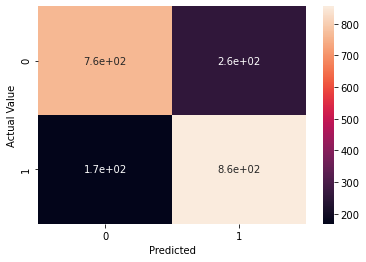

In [111]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1019
           1       0.77      0.84      0.80      1023

    accuracy                           0.79      2042
   macro avg       0.79      0.79      0.79      2042
weighted avg       0.79      0.79      0.79      2042



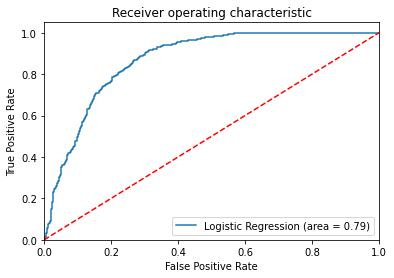

In [112]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### MODEL 2 : using Newtons' - cg solver 

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'newton-cg', random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [114]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier using newton-cg solver  on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier using newton-cg solver  on test set: 0.79


In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[763 256]
 [168 855]]


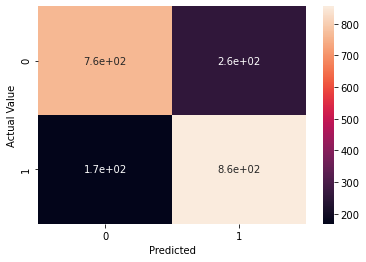

In [116]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1019
           1       0.77      0.84      0.80      1023

    accuracy                           0.79      2042
   macro avg       0.79      0.79      0.79      2042
weighted avg       0.79      0.79      0.79      2042



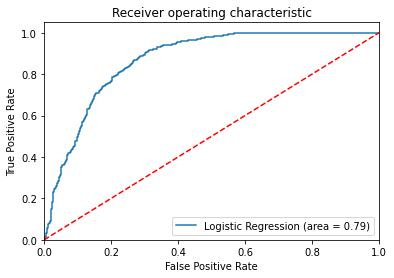

In [118]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### MODEL 3 - using saga solver 

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'saga', random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='saga')

In [120]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier using newton-cg solver  on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier using newton-cg solver  on test set: 0.79


In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[763 256]
 [168 855]]


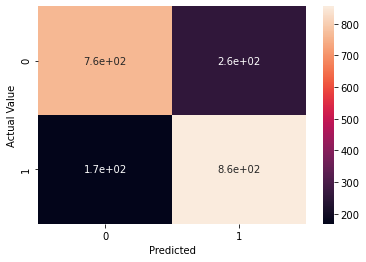

In [122]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1019
           1       0.77      0.84      0.80      1023

    accuracy                           0.79      2042
   macro avg       0.79      0.79      0.79      2042
weighted avg       0.79      0.79      0.79      2042



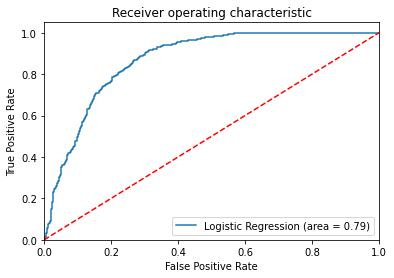

In [124]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()